In [1]:
import json
import os

import importlib
import pandas as pd
import pyperclip as clip

import Functions as F

In [2]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=5nmzDkGBROSFM1DoUdIAaP5v9PtdY0&access_type=offline


id                                               joke   origin_id  \
9  1082  I have kleptomania, but when it gets bad, I ta...  5hyP79pOCd   

   culture        category                                        description  \
9  General  icanhazdadjoke  Pun on kleptomania treated by 'taking' somethi...   

          title c1_name c2_name c1_gender  ...  \
9  Clever Thief   Kevin     Doc      male  ...   

                              c1_2                          c2_2  \
9  I can't stop stealing things...  That’s quite serious, Kevin.   

                                          n_3                         c1_3  \
9  Kevin looks around nervously, then smirks.  Yeah, it's getting worse...   

                             c2_3  \
9  Should we consider medication?   

                                               n_4  \
9  Kevin grins, pulling something from his pocket.   

                               c1_4                             c2_4  \
9  I already took something for it.  Kevin! That’s not what I meant!   

                                         script_flow          image_id  
9  [n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...  DknvMieZ1gU7PF24  

[1 rows x 25 columns]

### Code 101&102: Generate Story and Images

In [69]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

My sister bet me $15 that I couldn't build a car out of spaghetti. You should have seen the look on her face as I drove pasta.


In [70]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [71]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    doc_id = JS.google.create_docs(result['message'])
    print(doc_id)
else:
    print(result['message'])

Success: Story Data Updated
Success: Image Preprocessing
Success: New Docs Created
{'1089_PastaCar': '18BzMSV7z06PCvnYouRP7pVlAO_3pzVndxPG3EnWy6mc'}


### Code 104: SNS Messages

In [58]:
# Get the list of documentId; return {"id_title": "documentId"}
doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_ids)

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1070_PorkyPineTale.json' and branch: 'main'
  - documentId: 1V3w6LUTrDyLh1ncrBXQldwLPg7b0xroB1bgMV6C9JLU
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1071_PizzaHistory.json' and branch: 'main'
  - documentId: 1MxR83W3GU38x53qGyslhMWsn4BCd-8TSX54KlltKRCE
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1072_BananaBlues.json' and branch: 'main'
  - documentId: 1NRq1pAULzKF55ecnfWs1XiYMhUYgud1wuoYrDRuTLYc
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge f

### Video Creation

In [51]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# Define ids of video to be generated
id_list = [i for i in range(1070, 1080)] 
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
exp_crop_mode = str({id_: 'auto' for id_ in id_list})
clip.copy(exp_crop_mode)

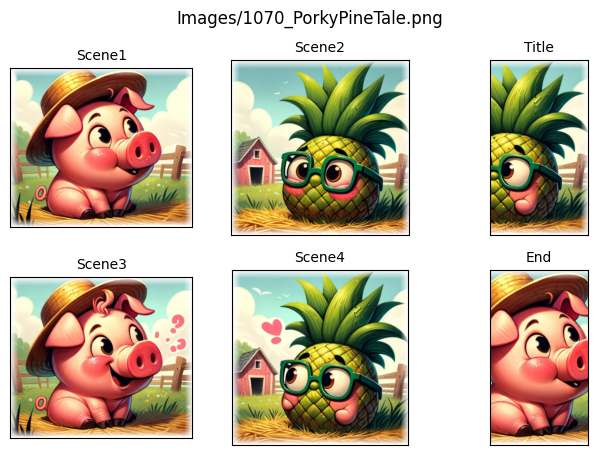

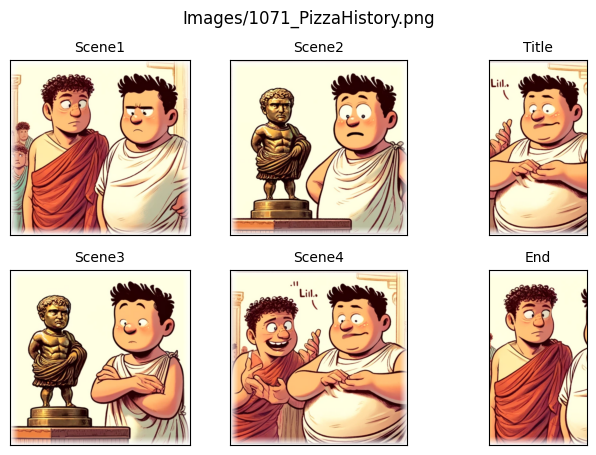

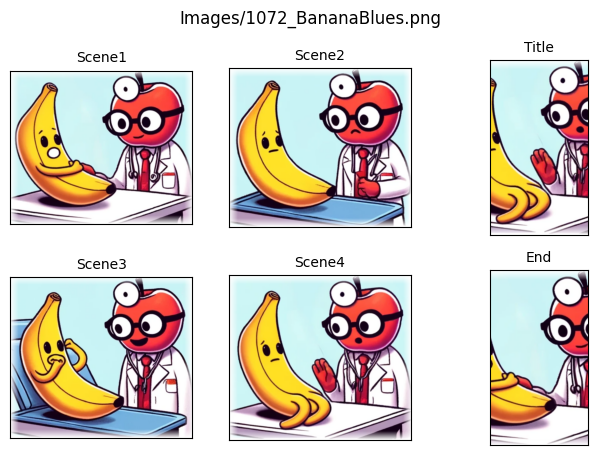

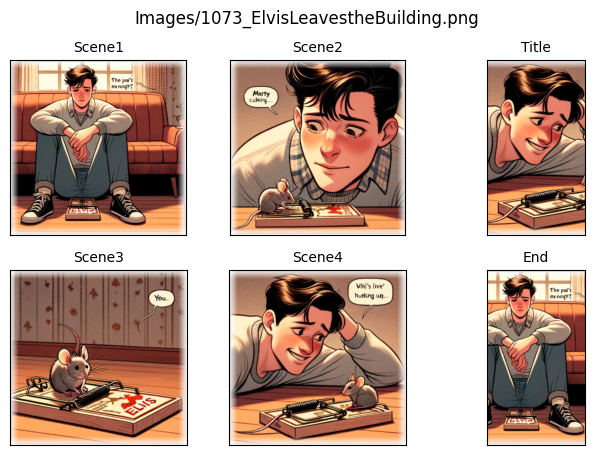

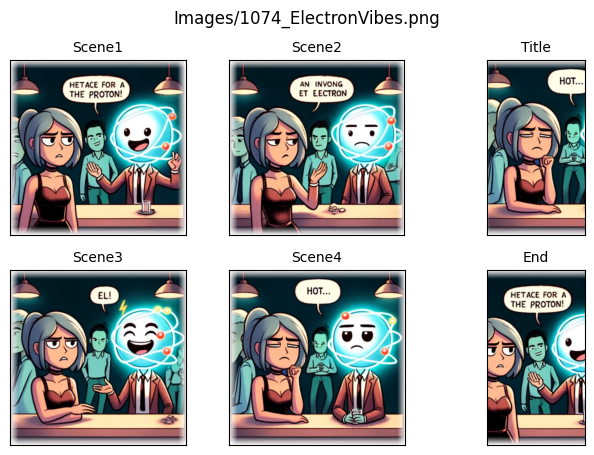

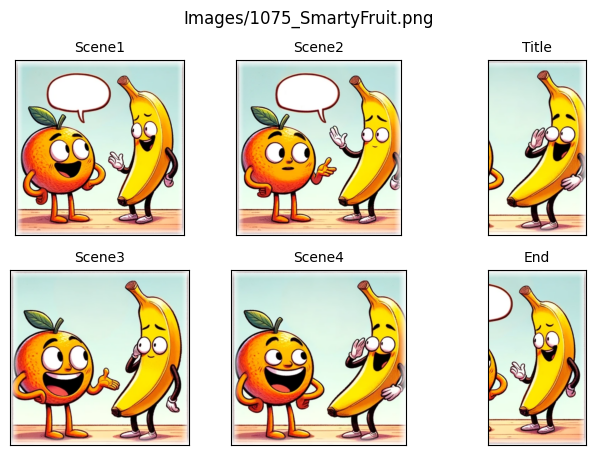

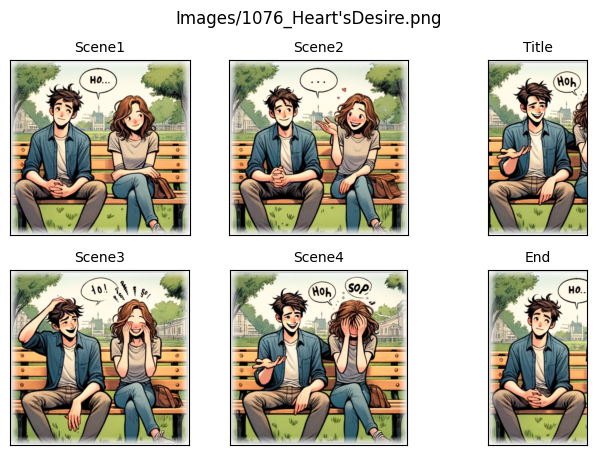

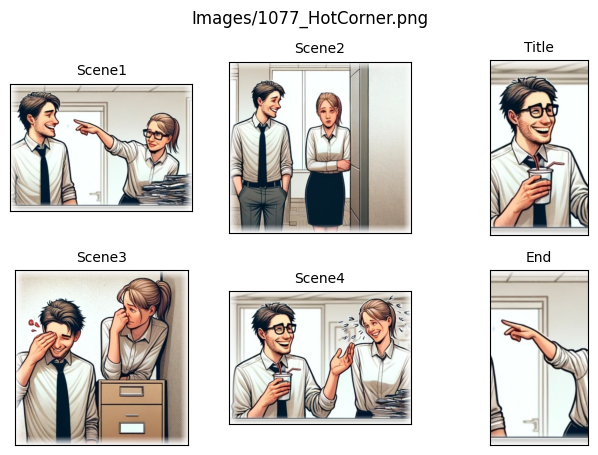

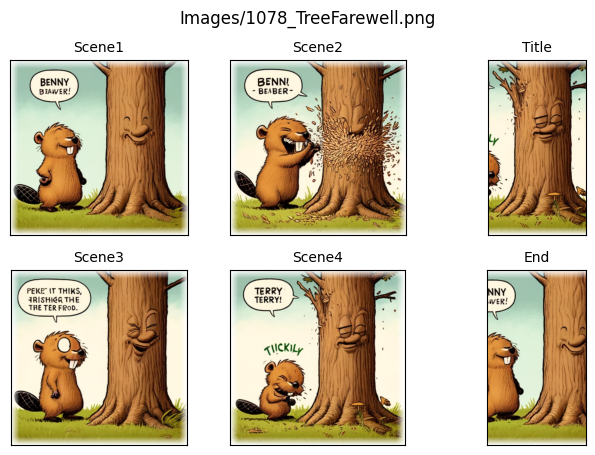

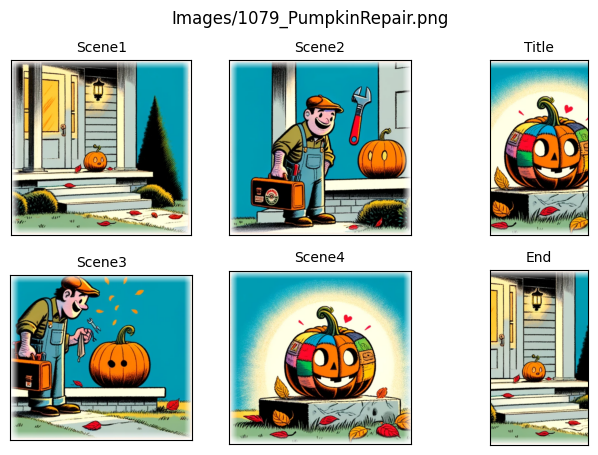

In [50]:
# Get list of image paths
img_path = [f"Images/{p}" for p in os.listdir('Images') if int(p.split('_')[0]) in id_list]

# Test image cropping
video.image_crop_test(img_path)

In [52]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here
crop_mode = crop_mode = {1070: 'auto', 1071: 'auto', 1072: 'auto', 1073: 'auto', 1074: 'auto', 1075: 'auto', 1076: 'auto', 1077: 'auto', 1078: 'auto', 1079: 'auto'}

if confirm == 'y':
    video_names = video.generate_video(id_list=id_list, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

Moviepy - Building video Videos/1070_PorkyPineTale.mp4.
MoviePy - Writing audio in 1070_PorkyPineTaleTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1070_PorkyPineTale.mp4



Moviepy - Done !
Moviepy - video ready Videos/1070_PorkyPineTale.mp4
Moviepy - Building video Videos/1071_PizzaHistory.mp4.
MoviePy - Writing audio in 1071_PizzaHistoryTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1071_PizzaHistory.mp4



Moviepy - Done !
Moviepy - video ready Videos/1071_PizzaHistory.mp4
Moviepy - Building video Videos/1072_BananaBlues.mp4.
MoviePy - Writing audio in 1072_BananaBluesTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1072_BananaBlues.mp4



Moviepy - Done !
Moviepy - video ready Videos/1072_BananaBlues.mp4
Moviepy - Building video Videos/1073_ElvisLeavestheBuilding.mp4.
MoviePy - Writing audio in 1073_ElvisLeavestheBuildingTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1073_ElvisLeavestheBuilding.mp4



Moviepy - Done !
Moviepy - video ready Videos/1073_ElvisLeavestheBuilding.mp4
Moviepy - Building video Videos/1074_ElectronVibes.mp4.
MoviePy - Writing audio in 1074_ElectronVibesTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1074_ElectronVibes.mp4



Moviepy - Done !
Moviepy - video ready Videos/1074_ElectronVibes.mp4
Moviepy - Building video Videos/1075_SmartyFruit.mp4.
MoviePy - Writing audio in 1075_SmartyFruitTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1075_SmartyFruit.mp4



Moviepy - Done !
Moviepy - video ready Videos/1075_SmartyFruit.mp4
Moviepy - Building video Videos/1076_Heart'sDesire.mp4.
MoviePy - Writing audio in 1076_Heart'sDesireTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1076_Heart'sDesire.mp4



Moviepy - Done !
Moviepy - video ready Videos/1076_Heart'sDesire.mp4
Moviepy - Building video Videos/1077_HotCorner.mp4.
MoviePy - Writing audio in 1077_HotCornerTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1077_HotCorner.mp4



Moviepy - Done !
Moviepy - video ready Videos/1077_HotCorner.mp4
Moviepy - Building video Videos/1078_TreeFarewell.mp4.
MoviePy - Writing audio in 1078_TreeFarewellTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1078_TreeFarewell.mp4



Moviepy - Done !
Moviepy - video ready Videos/1078_TreeFarewell.mp4
Moviepy - Building video Videos/1079_PumpkinRepair.mp4.
MoviePy - Writing audio in 1079_PumpkinRepairTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1079_PumpkinRepair.mp4



Moviepy - Done !
Moviepy - video ready Videos/1079_PumpkinRepair.mp4
['1070_PorkyPineTale', '1071_PizzaHistory', '1072_BananaBlues', '1073_ElvisLeavestheBuilding', '1074_ElectronVibes', '1075_SmartyFruit', "1076_Heart'sDesire", '1077_HotCorner', '1078_TreeFarewell', '1079_PumpkinRepair']


### Video Schedule Post

In [59]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [60]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules(list(current_schedule), num_videos=len(v_docs))

v_titles, v_contents, v_tags, v_paths, v_schedules = [], [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    v_tags.append({}) 
    # path
    v_paths.append(f"Videos/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

Success: No scheduled videos are found


Title  \
0           Joke Story: Porky Pine Tale   
1             Joke Story: Pizza History   
2              Joke Story: Banana Blues   
3  Joke Story: Elvis Leavesthe Building   
4            Joke Story: Electron Vibes   
5              Joke Story: Smarty Fruit   
6            Joke Story: Heart's Desire   
7                Joke Story: Hot Corner   
8             Joke Story: Tree Farewell   
9            Joke Story: Pumpkin Repair   

                                             Content  \
0  🐷🌲 Dive into "Porky Pine Tale," a whimsical st...   
1  🍕📜 Dive into "Pizza History," where culinary t...   
2  🍌😷 Dive into "Banana Blues," a humorous twist ...   
3  🎤🚪 Dive into "Elvis Leaves the Building," a wi...   
4  🔬⚡ Dive into "Electron Vibes," a lighthearted ...   
5  🍊🍌 Dive into "Smarty Fruit," where citrus wit ...   
6  💖💭 Dive into "Heart's Desire," where a romanti...   
7  🌡️📐 Dive into "Hot Corner," where office setup...   
8  🌳🐾 Dive into "Tree Farewell," a witty exchange...   
9  🎃🛠️ Dive into "Pumpkin Repair," a whimsical ta...   

                                     Path              Schedule  
0           Videos/1070_PorkyPineTale.mp4  2024-05-06T12:00:00Z  
1            Videos/1071_PizzaHistory.mp4  2024-05-06T13:00:00Z  
2             Videos/1072_BananaBlues.mp4  2024-05-07T12:00:00Z  
3  Videos/1073_ElvisLeavestheBuilding.mp4  2024-05-07T13:00:00Z  
4           Videos/1074_ElectronVibes.mp4  2024-05-08T12:00:00Z  
5             Videos/1075_SmartyFruit.mp4  2024-05-08T13:00:00Z  
6           Videos/1076_Heart'sDesire.mp4  2024-05-09T12:00:00Z  
7               Videos/1077_HotCorner.mp4  2024-05-09T13:00:00Z  
8            Videos/1078_TreeFarewell.mp4  2024-05-10T12:00:00Z  
9           Videos/1079_PumpkinRepair.mp4  2024-05-10T13:00:00Z

In [4]:
# post_video
import time
for i in range(len(v_titles)):
    result = JS.google.post_video(v_titles[i], v_contents[i], v_tags[i], v_paths[i], v_schedules[i])
    print(result)
    time.sleep(5)

{'status': 'success', 'videoId': 'oKg4qBEq9nI'}
{'status': 'success', 'videoId': 'juXCmdCXePY'}
{'status': 'success', 'videoId': 'tJH6Idmz1ME'}
{'status': 'success', 'videoId': 'FaruDFxtp7Q'}


In [62]:
# if the quote reaches to the maximum in YouTube Data API
#  copy and paste, then execute the above cell again.
start_idx = 6
print(f"""
v_titles = {v_titles[start_idx:]}
v_contents = {v_contents[start_idx:]}
v_tags = {v_tags[start_idx:]}
v_paths = {v_paths[start_idx:]}
v_schedules = {v_schedules[start_idx:]}
""")


v_titles = ["Joke Story: Heart's Desire", 'Joke Story: Hot Corner', 'Joke Story: Tree Farewell', 'Joke Story: Pumpkin Repair']
v_contents = ['💖💭 Dive into "Heart\'s Desire," where a romantic query meets a literal mind! 💑 On a serene park bench, Julia turns to Mark with a curious smile, probing the depths of philosophical musings about what brings them to such profound discussions. She playfully asks what his heart desires, expecting a sweet response. Mark ponders deeply, missing the romantic cue, and earnestly responds that primarily, his heart desires blood and oxygen, much to Julia\'s dismay. As he elaborates on neural messages, Julia tries to steer him back to romantic sentiments, but Mark chuckles at his practicality. They both laugh, enjoying the mix-up between literal interpretations and romantic expectations. Will Mark ever catch the romantic hint, or will his pragmatic heart always lead the way? Explore this amusing misunderstanding full of love, logic, and laughter. #Romantic

### Code 100: Generate Jokes

#### Joke Prompts

In [3]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

id  culture   category  \
185  185  General  Valentine   
186  186  General  Valentine   
187  187  General  Valentine   
188  188  General  Valentine   
189  189  General  Valentine   

                                                  joke  
185  What's a chocolate's favorite kind of music on...  
186  Why was the chocolate box nervous on Valentine...  
187  How do chocolates stay fit for Valentine's Day...  
188  What did the chocolate say to the Valentine's ...  
189  Why did the chocolate give his girlfriend a bo...

In [14]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

id  culture             category  \
157  157  General  Observational humor   
158  158  General       Wordplay jokes   
159  159  General         Animal jokes   
160  160  General         Doctor jokes   
161  161  General     Technology jokes   

                                                  joke  
157  Isn't it funny how we never see snowmen at the...  
158  If April showers bring May flowers, what do Ma...  
159  Why don’t polar bears get married in winter? B...  
160  Why do doctors make the worst snowmen? Because...  
161  Why did the smartphone wear a scarf? Because i...

In [15]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs